Forecast the Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

### Import Necessary Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error,mean_squared_error

### Import dataset

In [2]:
airline_data = pd.read_excel('Airlines+Data.xlsx')
airline_data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


### Initial Analysis

In [3]:
airline_data.shape

(96, 2)

In [4]:
airline_data.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [5]:
airline_data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
airline_data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


### Visualization of data

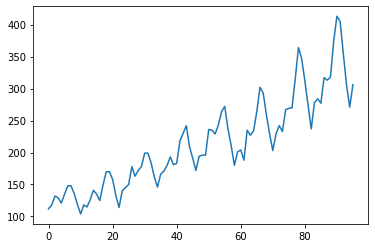

In [8]:
plt.plot(airline_data['Passengers'])

<AxesSubplot:xlabel='Passengers', ylabel='Density'>

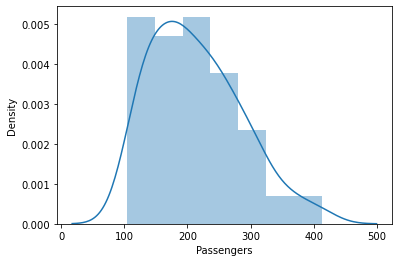

In [9]:
sns.distplot(airline_data['Passengers'])

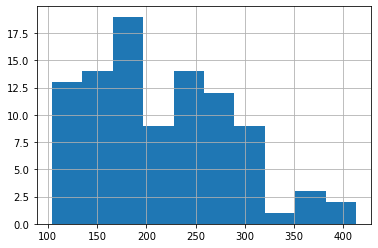

In [10]:
airline_data['Passengers'].hist()
plt.show()

In [11]:
airline_data.rename(columns={'Month':'Date'},inplace = True)

In [12]:
airline_data.head()

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [13]:
airline_data['year'] = airline_data.Date.dt.strftime('%Y')
airline_data['month'] = airline_data.Date.dt.strftime('%b')
airline_data['date'] = airline_data.Date.dt.strftime('%d')

In [14]:
airline_data

,Date,Passengers,year,month,date
0,1995-01-01,112,1995,Jan,01
1,1995-02-01,118,1995,Feb,01
2,1995-03-01,132,1995,Mar,01
3,1995-04-01,129,1995,Apr,01
4,1995-05-01,121,1995,May,01
...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01
92,2002-09-01,355,2002,Sep,01
93,2002-10-01,306,2002,Oct,01
94,2002-11-01,271,2002,Nov,01


In [15]:
# heat map
airline_table = pd.pivot_table(data=airline_data,index='year',columns='month',values = 'Passengers',aggfunc='mean',fill_value=0)
airline_table

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<AxesSubplot:xlabel='month', ylabel='year'>

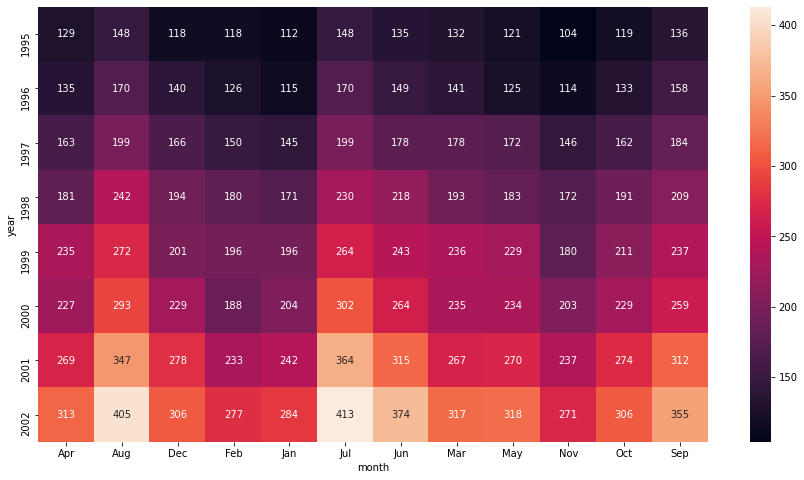

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(data=airline_table,annot = True,fmt='g')

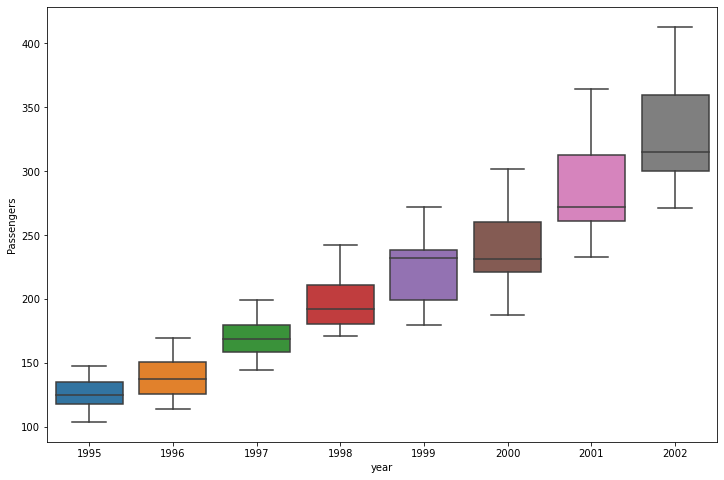

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'year', y = 'Passengers',data = airline_data)
plt.show()

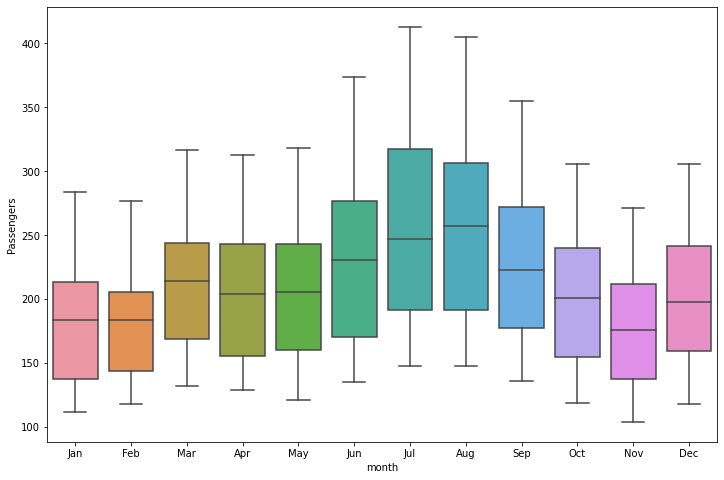

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'month', y = 'Passengers',data = airline_data)
plt.show()

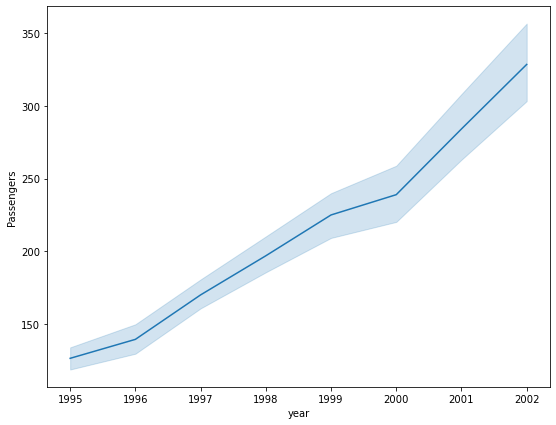

In [19]:
plt.figure(figsize=(9,7))
sns.lineplot(x = 'year', y = 'Passengers',data = airline_data)
plt.show()

In [20]:
airline_data['t']= np.arange(0,96)
airline_data['t_square'] = airline_data['t']*airline_data['t']
airline_data['log_passanger'] = np.log(airline_data['Passengers'])

In [21]:
airline_data

,Date,Passengers,year,month,date,t,t_square,log_passanger
0,1995-01-01,112,1995,Jan,01,0,0,4.718499
1,1995-02-01,118,1995,Feb,01,1,1,4.770685
2,1995-03-01,132,1995,Mar,01,2,4,4.882802
3,1995-04-01,129,1995,Apr,01,3,9,4.859812
4,1995-05-01,121,1995,May,01,4,16,4.795791
...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01,91,8281,6.003887
92,2002-09-01,355,2002,Sep,01,92,8464,5.872118
93,2002-10-01,306,2002,Oct,01,93,8649,5.723585
94,2002-11-01,271,2002,Nov,01,94,8836,5.602119


In [22]:
month_dummies = pd.get_dummies(airline_data['month'])

In [23]:
month_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [24]:
airline_new = pd.concat([airline_data,month_dummies] ,axis = 1)

In [25]:
airline_new

,Date,Passengers,year,month,date,t,t_square,log_passanger,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995,Jan,01,0,0,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,Feb,01,1,1,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,Mar,01,2,4,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,Apr,01,3,9,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,May,01,4,16,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,Aug,01,91,8281,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002,Sep,01,92,8464,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002,Oct,01,93,8649,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002,Nov,01,94,8836,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


### Spiltting data

In [26]:
train = airline_new.head(80)
test = airline_new.tail(16)

In [27]:
# linear model
linear_model= smf.ols('Passengers~t',data=train).fit()
pred_linear = pd.Series(linear_model.predict(test['t']))
rmse_linear = np.sqrt(mean_squared_error(test['Passengers'],pred_linear))
rmse_linear

47.54262406772677

In [28]:
# exponential model
ex_model= smf.ols('log_passanger~t',data=train).fit()
pred_expo = pd.Series(ex_model.predict(test['t']))
rmse_expo = np.sqrt(mean_squared_error(test['Passengers'],np.exp(pred_expo)))
rmse_expo

43.79373939334316

In [29]:
# qudratic model
qudratic_model = smf.ols('Passengers~t+t_square',data=train).fit()
pred_qudratic = pd.Series(qudratic_model.predict(test[['t','t_square']]))
rmse_qudratic = np.sqrt(mean_squared_error(test['Passengers'],pred_qudratic))
rmse_qudratic

43.65440369584195

In [30]:
# #Additive seasonality
add_model = smf.ols('Passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train).fit()
pred_add = pd.Series(add_model.predict(test[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep']]))
rmse_add = np.sqrt(mean_squared_error(test['Passengers'],pred_add))
rmse_add

129.26647641443301

In [31]:
#Additive Seasonality Quadratic

asq_model = smf.ols('Passengers~t+t_square+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train).fit()
pred_asq = pd.Series(asq_model.predict(test[['Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep','t','t_square']]))
rmse_asq = np.sqrt(mean_squared_error(test['Passengers'],pred_asq))
rmse_asq

23.910983570095127

In [32]:
# multiplicative seasonality
multi_sea_model = smf.ols('log_passanger~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep',data=train).fit()
pred_multi_sea = pd.Series(multi_sea_model.predict(test))
rmec_multi_sea = np.sqrt(mean_squared_error(test['log_passanger'],np.exp(pred_multi_sea)))
rmec_multi_sea

178.01812094608124

In [33]:
#Multiplicative Additive Seasonality
mult_add_sea = smf.ols('log_passanger~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=train).fit()
pred_mult_add_sea = mult_add_sea.predict(test)
rmse_mult_add_sea = np.sqrt(mean_squared_error(test['Passengers'],np.exp(pred_mult_add_sea)))
rmse_mult_add_sea

9.469000230370773

In [34]:
# compare model 
data = {'model':(['linear_model','ex_model','qudratic_model','add_model','asq_model','multi_sea_model','mult_add_sea']),
                     'rmse_value': ([rmse_linear,rmse_expo,rmse_qudratic,rmse_add,rmse_asq,rmec_multi_sea,rmse_mult_add_sea])}

In [35]:
rmse_data = pd.DataFrame(data)
rmse_data.sort_values('rmse_value')

,model,rmse_value
6,mult_add_sea,9.469000
4,asq_model,23.910984
2,qudratic_model,43.654404
1,ex_model,43.793739
0,linear_model,47.542624
3,add_model,129.266476
5,multi_sea_model,178.018121


### Final model

In [36]:
airline_new.head()

,Date,Passengers,year,month,date,t,t_square,log_passanger,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995,Jan,01,0,0,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,Feb,01,1,1,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,Mar,01,2,4,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,Apr,01,3,9,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,May,01,4,16,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


In [37]:
# Building the model on entire data set
# choosing "Multiplicative Additive seosanality" (mult_add_sea)

### Data generation for prediction

In [38]:
t = np.arange(97,108)
t

array([ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107])

In [39]:
t_square = t*t
t_square

array([ 9409,  9604,  9801, 10000, 10201, 10404, 10609, 10816, 11025,
       11236, 11449])

In [40]:
month = pd.date_range(start='1/1/2003',end='11/1/2003',freq='MS')

In [41]:
month

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01', '2003-11-01'],
              dtype='datetime64[ns]', freq='MS')

In [42]:
Month = pd.DataFrame(month,columns=['Date'])
Month

,Date
0,2003-01-01
1,2003-02-01
2,2003-03-01
3,2003-04-01
4,2003-05-01
5,2003-06-01
6,2003-07-01
7,2003-08-01
8,2003-09-01
9,2003-10-01


In [43]:
df = {'t':t,'t_square': t_square}
value = pd.DataFrame(df)
value

,t,t_square
0,97,9409
1,98,9604
2,99,9801
3,100,10000
4,101,10201
5,102,10404
6,103,10609
7,104,10816
8,105,11025
9,106,11236


In [44]:
data = pd.concat([Month,value],axis = 1)
data

,Date,t,t_square
0,2003-01-01,97,9409
1,2003-02-01,98,9604
2,2003-03-01,99,9801
3,2003-04-01,100,10000
4,2003-05-01,101,10201
5,2003-06-01,102,10404
6,2003-07-01,103,10609
7,2003-08-01,104,10816
8,2003-09-01,105,11025
9,2003-10-01,106,11236


In [45]:
data['Day'] = data['Date'].dt.strftime('%d')
data['month'] = data['Date'].dt.strftime('%b')
data['year'] = data['Date'].dt.strftime('%Y')

In [46]:
data

,Date,t,t_square,Day,month,year
0,2003-01-01,97,9409,01,Jan,2003
1,2003-02-01,98,9604,01,Feb,2003
2,2003-03-01,99,9801,01,Mar,2003
3,2003-04-01,100,10000,01,Apr,2003
4,2003-05-01,101,10201,01,May,2003
5,2003-06-01,102,10404,01,Jun,2003
6,2003-07-01,103,10609,01,Jul,2003
7,2003-08-01,104,10816,01,Aug,2003
8,2003-09-01,105,11025,01,Sep,2003
9,2003-10-01,106,11236,01,Oct,2003


In [48]:
month_dummy = pd.get_dummies(data['month'])
month_dummy

,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,1,0


In [49]:
final_data = pd.concat([data,month_dummy],axis = 1)
final_data.head()

,Date,t,t_square,Day,month,year,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2003-01-01,97,9409,01,Jan,2003,0,0,0,1,0,0,0,0,0,0,0
1,2003-02-01,98,9604,01,Feb,2003,0,0,1,0,0,0,0,0,0,0,0
2,2003-03-01,99,9801,01,Mar,2003,0,0,0,0,0,0,1,0,0,0,0
3,2003-04-01,100,10000,01,Apr,2003,1,0,0,0,0,0,0,0,0,0,0
4,2003-05-01,101,10201,01,May,2003,0,0,0,0,0,0,0,1,0,0,0


In [50]:
final_data.dtypes

Date        datetime64[ns]
t                    int32
t_square             int32
Day                 object
month               object
year                object
Apr                  uint8
Aug                  uint8
Feb                  uint8
Jan                  uint8
Jul                  uint8
Jun                  uint8
Mar                  uint8
May                  uint8
Nov                  uint8
Oct                  uint8
Sep                  uint8
dtype: object

### Forecasting

In [51]:
pred_final = mult_add_sea.predict(final_data)

In [52]:
pred_final

0     5.775485
1     5.791078
2     5.935442
3     5.899711
4     5.889992
5     6.008354
6     6.115617
7     6.115993
8     6.006672
9     5.879591
10    5.750080
dtype: float64

In [55]:
x = np.exp(pred_final)
x

0     322.300737
1     327.365856
2     378.207256
3     364.931945
4     361.402437
5     406.813139
6     452.875430
7     453.045477
8     406.129524
9     357.662998
10    314.215689
dtype: float64

In [58]:
pred_final = pd.DataFrame(x,columns=['pred_final'])
pred_final

,pred_final
0,322.300737
1,327.365856
2,378.207256
3,364.931945
4,361.402437
5,406.813139
6,452.875430
7,453.045477
8,406.129524
9,357.662998


In [60]:
pred_data = pd.concat([final_data,round(pred_final)],axis=1)
pred_data

,Date,t,t_square,Day,month,year,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,pred_final
0,2003-01-01,97,9409,01,Jan,2003,0,0,0,1,0,0,0,0,0,0,0,322.0
1,2003-02-01,98,9604,01,Feb,2003,0,0,1,0,0,0,0,0,0,0,0,327.0
2,2003-03-01,99,9801,01,Mar,2003,0,0,0,0,0,0,1,0,0,0,0,378.0
3,2003-04-01,100,10000,01,Apr,2003,1,0,0,0,0,0,0,0,0,0,0,365.0
4,2003-05-01,101,10201,01,May,2003,0,0,0,0,0,0,0,1,0,0,0,361.0
5,2003-06-01,102,10404,01,Jun,2003,0,0,0,0,0,1,0,0,0,0,0,407.0
6,2003-07-01,103,10609,01,Jul,2003,0,0,0,0,1,0,0,0,0,0,0,453.0
7,2003-08-01,104,10816,01,Aug,2003,0,1,0,0,0,0,0,0,0,0,0,453.0
8,2003-09-01,105,11025,01,Sep,2003,0,0,0,0,0,0,0,0,0,0,1,406.0
9,2003-10-01,106,11236,01,Oct,2003,0,0,0,0,0,0,0,0,0,1,0,358.0
